# Linear Regression - First Solution

## Importing the Libraries


The following script imports the necessary libraries:

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


from sklearn.linear_model import LinearRegression  
from sklearn import metrics  
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import statsmodels.formula.api as smf


import pandas as pd 
import requests
import numpy as np  
import matplotlib.pyplot as plt 
import datetime
%matplotlib inline

## Dataset

File has been downloaded and kept in my google drive. Follow code will help us to read the data into pandas dataframe.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

currentDT = datetime.datetime.now()
print("Current time:", currentDT)
filepath='/content/gdrive/My Drive/petrol_consumption.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Current time: 2019-07-13 11:40:41.780457


In [0]:
# url="https://drive.google.com/open?id=1mVmGNx6cbfvRHCDvF12ZL3wGLSHD9f"
# s=requests.get(url).content
# dataset=pd.read_csv(s)

Let's take a look at what our dataset actually looks like. Execute the head() command:

In [0]:
dataset = pd.read_csv('/content/gdrive/My Drive/petrol_consumption.csv')  
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


To see statistical details of the dataset, we'll use the describe() command again:

In [0]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


## Preparing the Data

The next step is to divide the data into attributes and labels as we did previously. However, unlike last time, this time around we are going to use column names for creating an attribute set and label. 

In [0]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',  
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']  

Execute the following code to divide our data into training and test sets:

In [0]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

## Training the Algorithm

And finally, to train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class:

In [0]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

in case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, execute the following script:

In [0]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df  

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


*  **This means that for a unit increase in "petroltax", there is a decrease of 40.016 million gallons in gas consumption.**
*  **Similarly, a unit increase in proportion of population with a drivers license results in an increase of 1.341 billion gallons of gas consumption.**

**We can see that "Averageincome" and "Paved_Highways" have a very little effect on the gas consumption.**

## Making Predictions

To make pre-dictions on the test data, execute the following script:

In [0]:
y_pred = regressor.predict(X_test)

To compare the actual output values for X_test with the predicted values, execute the following script:

In [0]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df  

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


## Evaluating the Algorithm

The final step is to evaluate the performance of algorithm. We'll do this by finding the values for MAE, MSE and RMSE. Execute the following script:

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 56.8222474789647
Mean Squared Error: 4666.344787588362
Root Mean Squared Error: 68.31064915215168


**You can see that the value of root mean squared error is 68.31, which is slightly greater than 10% of the mean value of the gas consumption in all states. This means that our algorithm was not very accurate but can still make reasonably good predictions.**

## Observations

**There are many factors that may have contributed to this inaccuracy, a few of which are listed here:**

* Need more data: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.
* Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
* Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.

# Linear Regression -Second Solution

## Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [0]:
import seaborn as sns
import statsmodels.formula.api as smf


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

currentDT = datetime.datetime.now()
print("Current time:", currentDT)
filepath='/content/gdrive/My Drive/Advertising.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Current time: 2019-07-12 17:58:42.768801


In [0]:
# read data into a DataFrame
data = pd.read_csv('/content/gdrive/My Drive/Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [0]:
# shape of the DataFrame
data.shape

(200, 5)

visualize the relationship between the features and the response using scatterplots

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


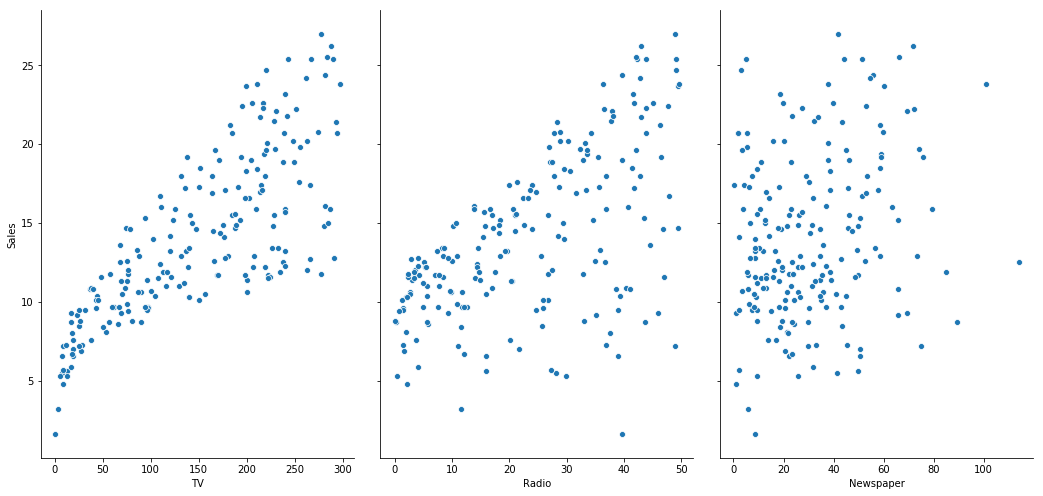

In [0]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

## Questions About the Advertising Data

This general question might lead you to more specific questions:
* Is there a relationship between ads and sales?
* How strong is that relationship?
* Which ad types contribute to sales?
* What is the effect of each ad type of sales?
* Given ad spending in a particular market, can sales be predicted?

## Simple Linear Regression

*  Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable")
*  It takes the following form:
*  y=β0+β1x 

What does each term represent?

*  y  is the response
*  x  is the feature
*  β0  is the intercept
*  β1  is the coefficient for x

*  β0  and  β1  are called the model coefficients

**To create your model, you must "learn" the values of these coefficients. Once we've learned these coefficients, we can use the model to predict Sales.**

## Estimating ("Learning") Model Coefficients

* Coefficients are estimated using the least squares criterion
  *   In other words, we find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"):

Let's estimate the model coefficients for the advertising data

In [0]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [0]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

7.032593549127695
[0.04753664]


## Interpreting Model Coefficients

**Interpreting the TV coefficient ( β1 )**

* A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales
* Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets
* Note here that the coefficients represent associations, not causations

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was $50,000. What would we predict for the Sales in that market?

y=β0+β1x
 
**y=7.032594+0.047537×50**
 
We would use 50 instead of 50,000 because the original data consists of examples that are divided by 1000

### Manual Prediction

In [0]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

### Statsmodels Prediction

In [0]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
lm1.predict(X_new)

0    9.409426
dtype: float64

In [0]:
### SCIKIT-LEARN ###

# predict for a new observation
lm2.predict(X_new)

array([9.40942557])

## Plotting the Least Squares Line

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


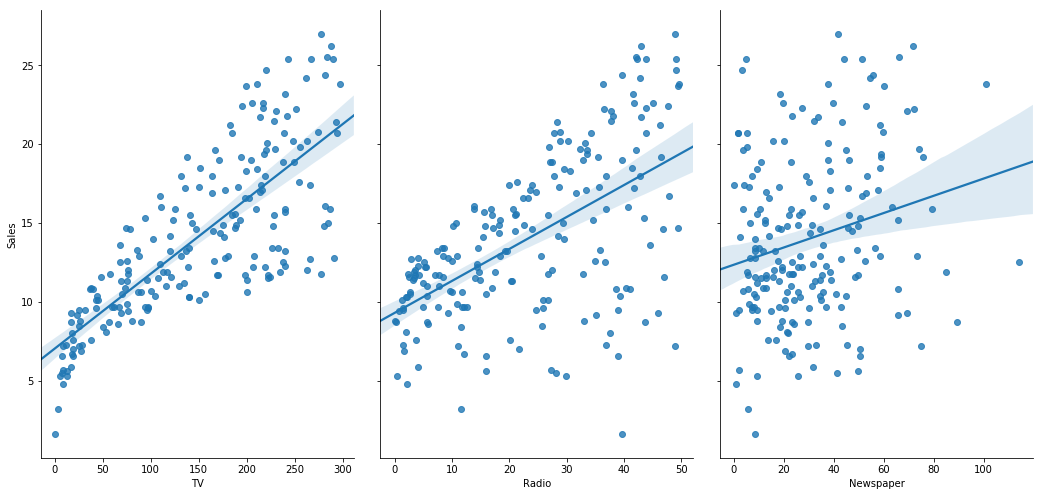

In [0]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Hypothesis Testing and p-values

**Steps for Hypothesis Testing**

*  Start with a null hypothesis and an alternative hypothesis (that is opposite the null)
*  Then, you check whether the data supports rejecting the null hypothesis or failing to reject the null hypothesis
  *  "failing to reject" the null is not the same as "accepting" the null hypothesis
  *  The alternative hypothesis may indeed be true, except that you just don't have enough data to show that

**Conventional hypothesis test**

*  null hypothesis:
There is no relationship between TV ads and Sales
β1  equals zero
*  alternative hypothesis:
There is a relationship between TV ads and Sales
β1  is not equal to zero

**Testing hypothesis**

*  Reject the null
  *  There is a relationship
  *  If the 95% confidence interval does not include zero
*  Fail to reject the null
  *  There is no relationship
  *  If the 95% confidence interval includes zero

In [0]:
### STATSMODELS ###

# print the p-values for the model coefficients
lm1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

**p-value**

Represents the probability that the coefficient is actually zero

**Interpreting p-values**

*  If the 95% confidence interval does not include zero
  *  p-value will be less than 0.05
  *  Reject the null
  *  There is a relationship
*  If the 95% confidence interval includes zero
  *  p-value for that coefficient will be greater than 0.05
  *  Fail to reject the null
  *  There is no relationship

* In this case, the p-value for TV is far less than 0.05
* We generally ignore the p-value for the intercept
* Believe that there is a relationship between TV ads and Sales

## How Well Does the Model Fit the data?

To evaluate the overall fit of a linear model, we use the R-squared value

* R-squared is the proportion of variance explained
  * It is the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model
    * The null model just predicts the mean of the observed response, and thus it has an intercept and no slope
* R-squared is between 0 and 1
  * Higher values are better because it means that more variance is explained by the model.

In [0]:
### STATSMODELS ###

# print the R-squared value for the model
lm1.rsquared

0.611875050850071

In [0]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
lm2.score(X, y)

0.611875050850071

**Is that a "good" R-squared value?**

* It's hard to say
* The threshold for a good R-squared value depends widely on the domain
* Therefore, it's most useful as a tool for comparing different models

# Linear Regression -Third Solution

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

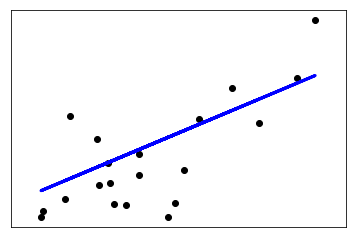

In [0]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()